In [22]:
from eyepacs_dataloader import EyePacsDataLoader
from eyepacs_dataset import EyePacsDataset
import torchvision.transforms as transforms

def get_vgg16_transforms():
  return transforms.Compose([
    transforms.ToPILImage(),  # Convert tensor to PIL Image
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

train_dataset = EyePacsDataset(
  annotations_file="../data/diabetic-retinopathy-detection/trainLabels.csv", 
  img_dir="../data/diabetic-retinopathy-detection/train/",
  transform=get_vgg16_transforms()
)
train_loader = EyePacsDataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=1, training=True)

print(train_loader.dataset.img_names)


0            10_left
1           10_right
2            13_left
3           13_right
4            15_left
            ...     
35121    44347_right
35122     44348_left
35123    44348_right
35124     44349_left
35125    44349_right
Name: image, Length: 35126, dtype: object


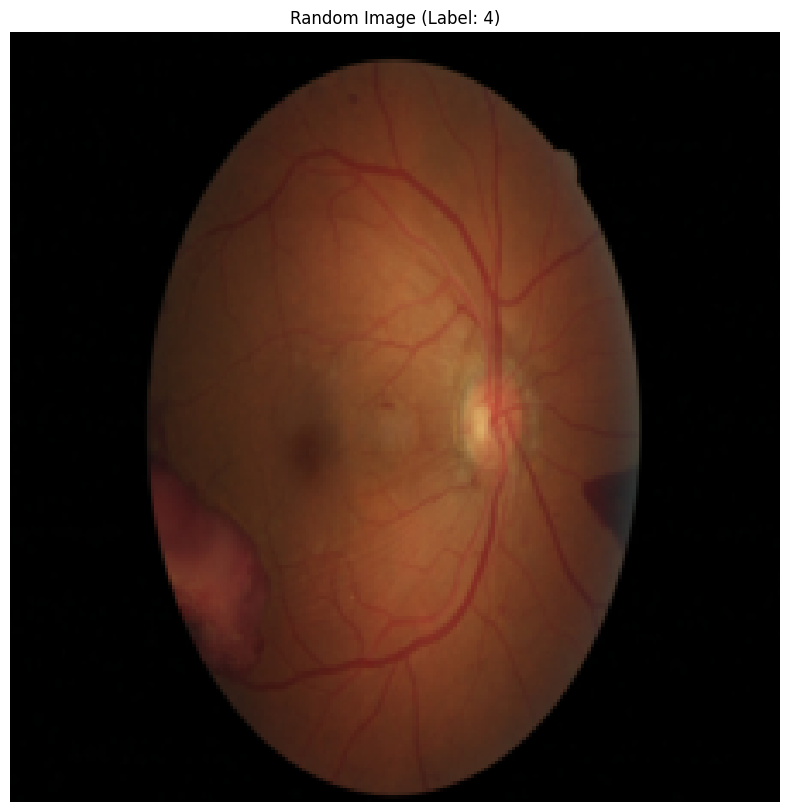

Image shape: torch.Size([3, 224, 224])
Label: 4
Image name: 6719_right


In [23]:
import random
import matplotlib.pyplot as plt

# Get a random image from the dataset
random_idx = random.randint(0, len(train_dataset) - 1)
image, label = train_dataset[random_idx]

# Convert the image tensor to numpy array and transpose dimensions for display
img_np = image.permute(1, 2, 0).numpy()

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.title(f"Random Image (Label: {label})")
plt.axis('off')
plt.show()

# Print image information
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
print(f"Image name: {train_dataset.img_names.iloc[random_idx]}")



Class Distribution:
level
0    25810
1     2443
2     5292
3      873
4      708
Name: count, dtype: int64


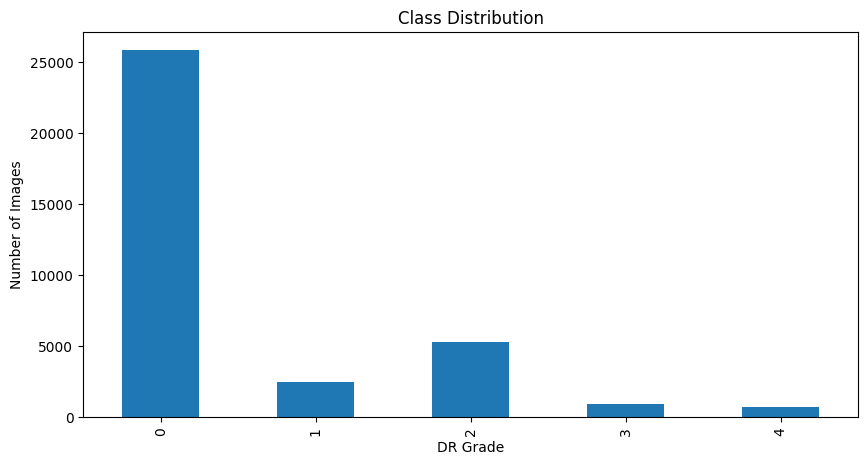

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Class distribution
class_distribution = train_loader.dataset.img_labels.value_counts().sort_index()
print("Class Distribution:")
print(class_distribution)

plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('DR Grade')
plt.ylabel('Number of Images')
plt.show()

In [25]:
# Image size and statistics
pixel_means = []
pixel_stds = []

for _ in range(1000):  # Sample 1000 random images
    idx = random.randint(0, len(train_dataset) - 1)
    image, _ = train_dataset[idx]
    pixel_means.append(image.mean(dim=[0,1,2]).numpy())
    pixel_stds.append(image.std(dim=[0,1,2]).numpy())

mean_rgb = np.mean(pixel_means, axis=0)
std_rgb = np.mean(pixel_stds, axis=0)

print("\nMean pixel values (RGB):", mean_rgb)
print("Std pixel values (RGB):", std_rgb)

KeyboardInterrupt: 

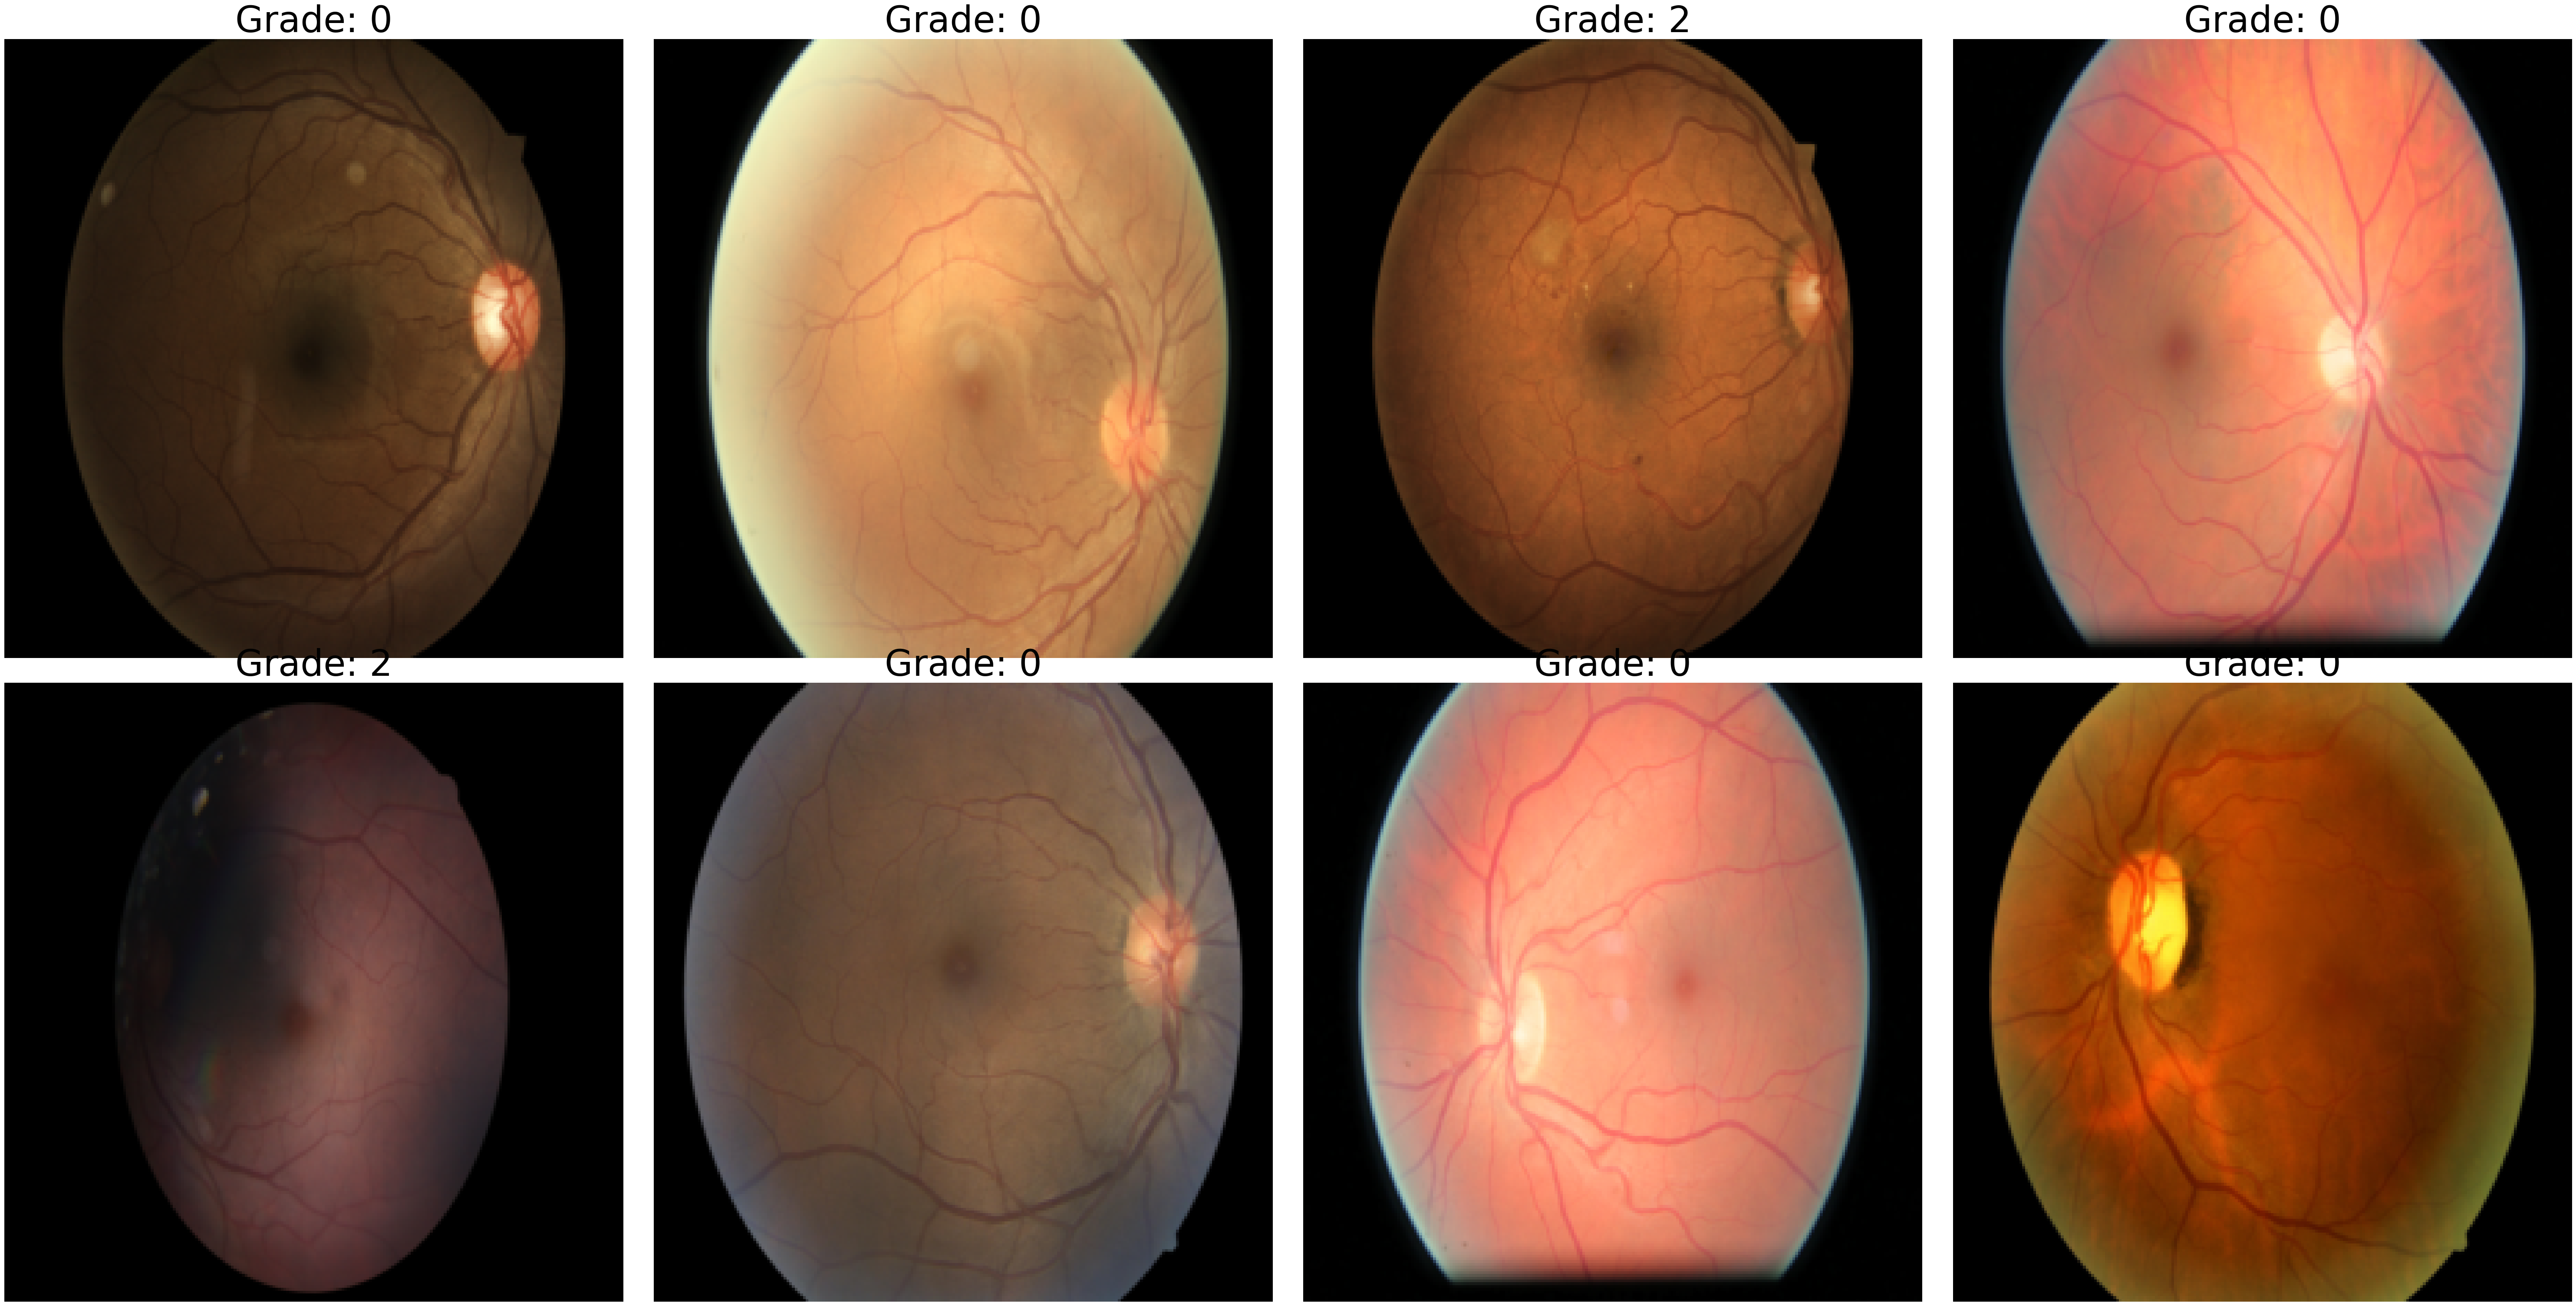

In [30]:
# Display sample images
def show_images(images, labels):
    fig, axes = plt.subplots(2, 4, figsize=(60, 30)) 
    axes = axes.ravel()
    
    for idx, (img, label) in enumerate(zip(images[:8], labels[:8])):
        axes[idx].imshow(img.permute(1, 2, 0))
        axes[idx].set_title(f"Grade: {label.item()}", fontsize=60)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Get a batch of images
images, labels = next(iter(train_loader))
show_images(images, labels)


Class label: 0
Class label: 1
Class label: 2
Class label: 3
Class label: 4


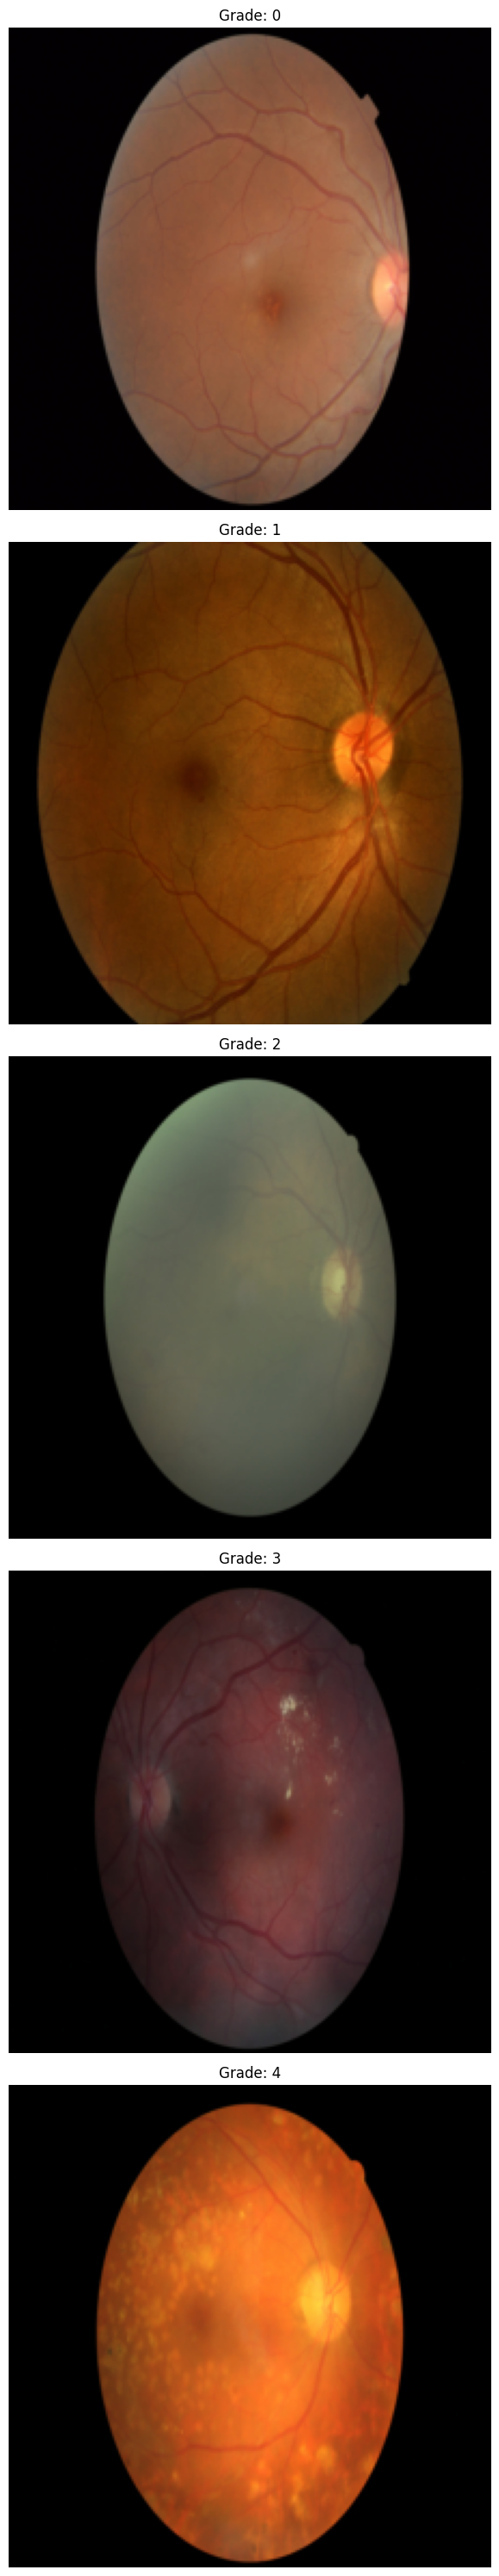

In [38]:
import torch

def show_images(images, labels, samples_per_class, num_classes):
    fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(60, 30))
    axes = axes.ravel()
    
    for idx, (img, label) in enumerate(zip(images, labels)):
        axes[idx].imshow(img.permute(1, 2, 0))
        axes[idx].set_title(f"Grade: {label.item()}")
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

samples_per_class = 1
num_classes = 5

sampled_images = []
sampled_labels = []

for class_label in range(num_classes):
    print(f"Class label: {class_label}")
    class_indices = [i for i, label in enumerate(train_dataset.img_labels) if label == class_label]
    
    if len(class_indices) >= samples_per_class:
        selected_indices = random.sample(class_indices, samples_per_class)
    else:
        selected_indices = class_indices  # Take all available if less than 4
    
    for idx in selected_indices:
        image, label = train_dataset[idx]
        sampled_images.append(image)
        sampled_labels.append(label)

# Convert to tensors
sampled_images = torch.stack(sampled_images)
sampled_labels = torch.tensor(sampled_labels)

# Display the sampled images
show_images(sampled_images, sampled_labels, samples_per_class, num_classes)